# Eksplorative metoder og tidsserier

**Formål**
- Kunne arbejde med tidsserier
- Visualisere tidsserier på forskellig vis
- Bruge forskellige visualiseringer
- Brug af anomaly detection til at udforske interessante punkter i data

**Indhold**
  - Introduktion til visualisering med plotnine
  - Overvejelser ved visualiseringer (Andy Kirk)
  - At arbejde med tidsserier i pandas
    - Tidsindeksering og datetime
    - Grupperinger på tid
    - Kombination af data på tid
    - Windows/rolling (https://pandas.pydata.org/pandas-docs/stable/user_guide/window.html#window-numba-engine)
      - "Rullende" udregninger baseret på tidligere observationer - gode til at visualisere trends i tidsserier, da outliers ikke skaber store udsving i visualiseringen
- Anomaly detection: https://www.datatechnotes.com/2020/05/anomaly-detection-with-kmeans-in-python.html

**Moduler?**
- Introduktion: Eksplorativ data analyse
- Overvejelser om visualiseringer
- Introduktion til visualiseringer med plotnine: https://plotnine.readthedocs.io/en/stable/index.html
    - https://www.r-graph-gallery.com/
    - https://ggplot2.tidyverse.org/index.html
- Sammenligning af kategorier/fordelinger
    - Histogram
    - Box-and-whisker plot
    - Univariate scatterplot/jitterplot
    - Bar chart
    - Dot plot: https://ggplot2.tidyverse.org/reference/geom_dotplot.html
- Udforskning af forhold/korrelationer
    - Scatterplot
    - Heatmap
- At arbejde med tidsserier i pandas
- Udforskning af tidsserier med visualiseringer
    - line plot
    - area plot
    - connected scatterplot: https://www.r-graph-gallery.com/connected_scatterplot_ggplot2.html
- Udforskning af tidsserier med anomaly detection

**Data**
- Intro til visualisering: ESS18
    - Øvelse: ESS18
- Tidsserier: Aktiedata og reddit-data
    - Øvelse: Reddit-data
- Tidsserier og visualieringer: Aktiedata og twitter-data
    - Øvelse: Reddit-data
- Tidsserier og anomaly detection: Aktiedata og twitter-data
    - Øvelse: Reddit-data
    

**Litteratur:**
- https://r4ds.had.co.nz/data-visualisation.html
- https://r4ds.had.co.nz/graphics-for-communication.html

In [1]:
import pandas as pd
import os

data_path = os.path.join("D:/", "data", "eikon")

tweetdata_url = "https://raw.githubusercontent.com/CALDISS-AAU/course_ddf/master/datasets/poltweets_sample.csv"
tweets_df = pd.read_csv(tweetdata_url)

redditdata_url = "https://raw.githubusercontent.com/CALDISS-AAU/course_ddf/master/datasets/reddit_rdenmark-comments_01032021-08032021_long.csv"
reddit_df = pd.read_csv(redditdata_url)

ess2018 = pd.read_csv("https://github.com/CALDISS-AAU/course_ndms-I/raw/master/datasets/ESS2018DK_subset.csv")

maersk_df = pd.read_csv(os.path.join(data_path, "maerskb_price-history_01072021-01092021.csv"))

In [2]:
maersk_df.head()

,Local Date,Local Time,Close,Net,%Chg,Open,Low,High,Volume
0,2021-09-01 10:30:00,2021-09-01 10:30:00,18040,-5.0,-0.000277,18055,18015,18080,709
1,2021-09-01 10:00:00,2021-09-01 10:00:00,18045,35.0,0.001943,18025,17985,18120,1144
2,2021-09-01 09:30:00,2021-09-01 09:30:00,18010,140.0,0.007834,17975,17920,18080,2030
3,2021-08-31 17:00:00,2021-08-31 17:00:00,17870,80.0,0.004497,17790,17500,17870,55188
4,2021-08-31 16:30:00,2021-08-31 16:30:00,17790,-45.0,-0.002523,17835,17790,17880,2051


In [3]:
import plotnine
from plotnine import ggplot, aes, labs, scale_size_continuous, theme_xkcd, theme_void, theme_seaborn, theme_538, theme_classic
plotnine.options.figure_size = (12, 10)

In [5]:
ess2018.head()

,idno,netustm,ppltrst,vote,prtvtddk,lvpntyr,tygrtr,gndr,yrbrn,edlvddk,eduyrs,wkhct,wkhtot,grspnum,frlgrsp,inwtm
0,110,180.0,8.0,Yes,Socialdemokratiet - The Social democrats,1968,Never too young,Male,1949,Kort videregående uddannelse af op til 2-3 års...,9.0,28.0,28.0,NaN,NaN,119.0
1,705,60.0,5.0,Yes,Det Konservative Folkeparti - Conservative Peo...,1976,67,Male,1958,Kort videregående uddannelse af op til 2-3 års...,22.0,37.0,45.0,NaN,NaN,55.0
2,1327,240.0,5.0,NaN,NaN,"Still in parental home, never left 2 months",NaN,Male,2000,Folkeskole 9.-10. klasse,11.0,37.0,37.0,NaN,NaN,37.0
3,3760,300.0,7.0,Not eligible to vote,NaN,"Still in parental home, never left 2 months",40,Male,2002,Folkeskole 9.-10. klasse,9.0,2.0,2.0,200.0,NaN,43.0
4,4658,90.0,8.0,Yes,NaN,1974,50,Female,1956,Kort videregående uddannelse af op til 2-3 års...,4.0,30.0,30.0,NaN,NaN,62.0


C:\programs\Anaconda3\envs\mlbase\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_ydensity : Removed 4 rows containing non-finite values.
C:\programs\Anaconda3\envs\mlbase\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_jitter : Removed 4 rows containing missing values.


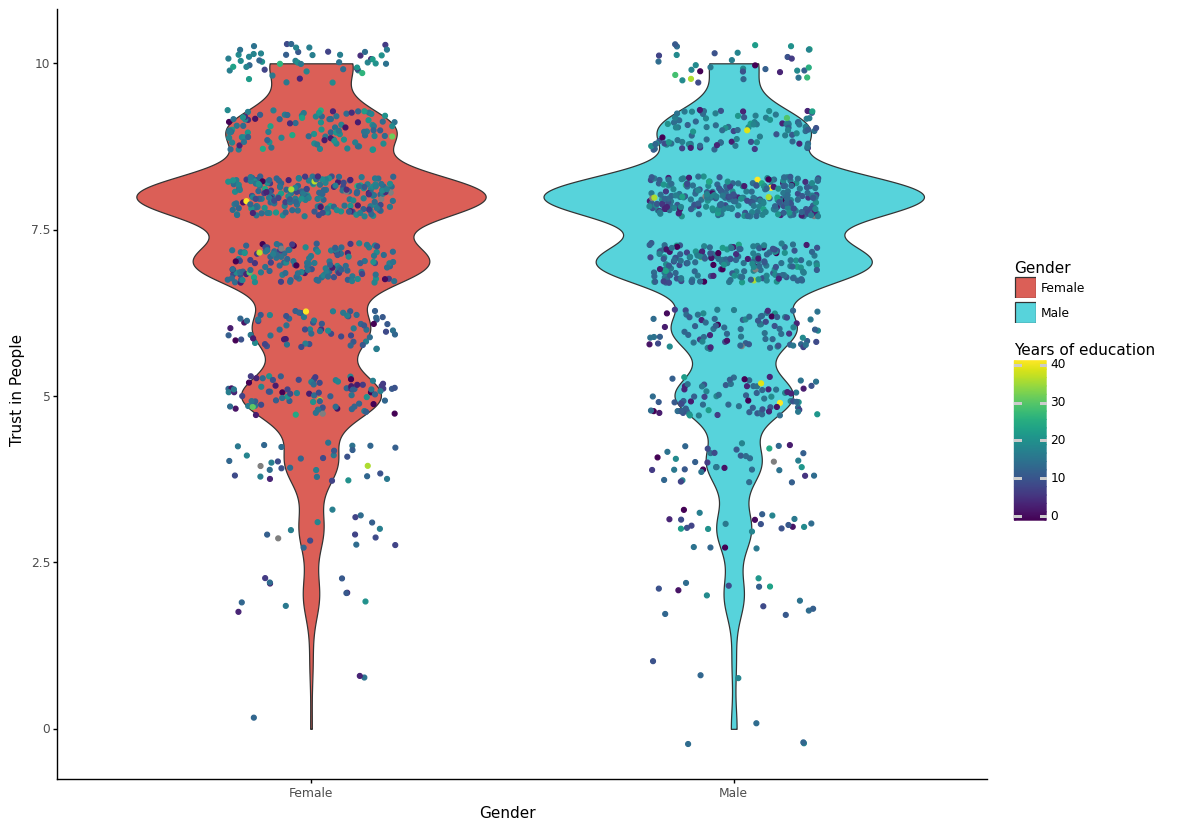

<ggplot: (-9223371926185493964)>

In [4]:
from plotnine import geom_violin, geom_jitter

(ggplot(ess2018, aes(x = 'gndr', y = 'ppltrst'))
 + geom_violin(aes(fill = 'gndr'))
 + geom_jitter(aes(colour = 'eduyrs'), height = 0.3, width = 0.2)
 + labs(x = 'Gender', y = 'Trust in People', fill = 'Gender', colour = 'Years of education')
 + theme_classic())

In [7]:
ess_g = ess2018.groupby(['prtvtddk', 'gndr']).mean().loc[:, ['ppltrst', 'eduyrs']]
ess_gs = pd.merge(ess_g, ess2018.groupby(['prtvtddk', 'gndr']).size().to_frame(name = 'n'), how = 'left', left_index = True, right_index = True).reset_index()

In [8]:
ess_gs.rename(columns = {'ppltrst': 'ppltrst_groupmean', 'eduyrs': 'eduyrs_groupmean', 'n': 'n_group'}, inplace = True)
ess_gs

,prtvtddk,gndr,ppltrst_groupmean,eduyrs_groupmean,n_group
0,Alternativet - The Alternative,Female,7.448276,17.896552,29
1,Alternativet - The Alternative,Male,7.791667,15.500000,24
2,Dansk Folkeparti - Danish People's Party,Female,6.156250,11.953125,64
3,Dansk Folkeparti - Danish People's Party,Male,6.407407,11.607477,108
4,Det Konservative Folkeparti - Conservative Peo...,Female,7.347826,15.000000,23
5,Det Konservative Folkeparti - Conservative Peo...,Male,7.172414,17.310345,29
6,Det Radikale Venstre - The Radical Liberal Party,Female,8.275862,16.896552,29
7,Det Radikale Venstre - The Radical Liberal Party,Male,7.604651,16.930233,43
8,Enhedslisten - Unity List - The Red-Green Alli...,Female,8.191489,16.106383,47
9,Enhedslisten - Unity List - The Red-Green Alli...,Male,7.136364,14.409091,44


In [9]:
ess_m = pd.merge(ess2018, ess_gs, how = 'left', on = ['prtvtddk', 'gndr']).dropna(subset = ['prtvtddk', 'eduyrs', 'ppltrst', 'gndr'])

In [10]:
ess_m.head()

,idno,netustm,ppltrst,vote,prtvtddk,lvpntyr,tygrtr,gndr,yrbrn,edlvddk,eduyrs,wkhct,wkhtot,grspnum,frlgrsp,inwtm,ppltrst_groupmean,eduyrs_groupmean,n_group
0,110,180.0,8.0,Yes,Socialdemokratiet - The Social democrats,1968,Never too young,Male,1949,Kort videregående uddannelse af op til 2-3 års...,9.0,28.0,28.0,NaN,NaN,119.0,7.154696,13.071823,181.0
1,705,60.0,5.0,Yes,Det Konservative Folkeparti - Conservative Peo...,1976,67,Male,1958,Kort videregående uddannelse af op til 2-3 års...,22.0,37.0,45.0,NaN,NaN,55.0,7.172414,17.310345,29.0
5,5816,90.0,7.0,Yes,SF Socialistisk Folkeparti - Socialist People'...,1994,60,Male,1974,Mellemlang videregående uddannelse af 3-4 års ...,35.0,37.0,37.0,37000.0,35000.0,61.0,7.133333,16.137931,30.0
6,7251,300.0,5.0,Yes,Dansk Folkeparti - Danish People's Party,1993,40,Female,1975,"Faglig uddannelse (håndværk, handel, landbrug ...",13.0,32.0,34.0,22000.0,30000.0,68.0,6.156250,11.953125,64.0
7,7887,360.0,8.0,Yes,Socialdemokratiet - The Social democrats,1983,55,Male,1958,Lang videregående uddannelse. Kandidatuddannel...,25.0,39.0,39.0,36000.0,42000.0,89.0,7.154696,13.071823,181.0


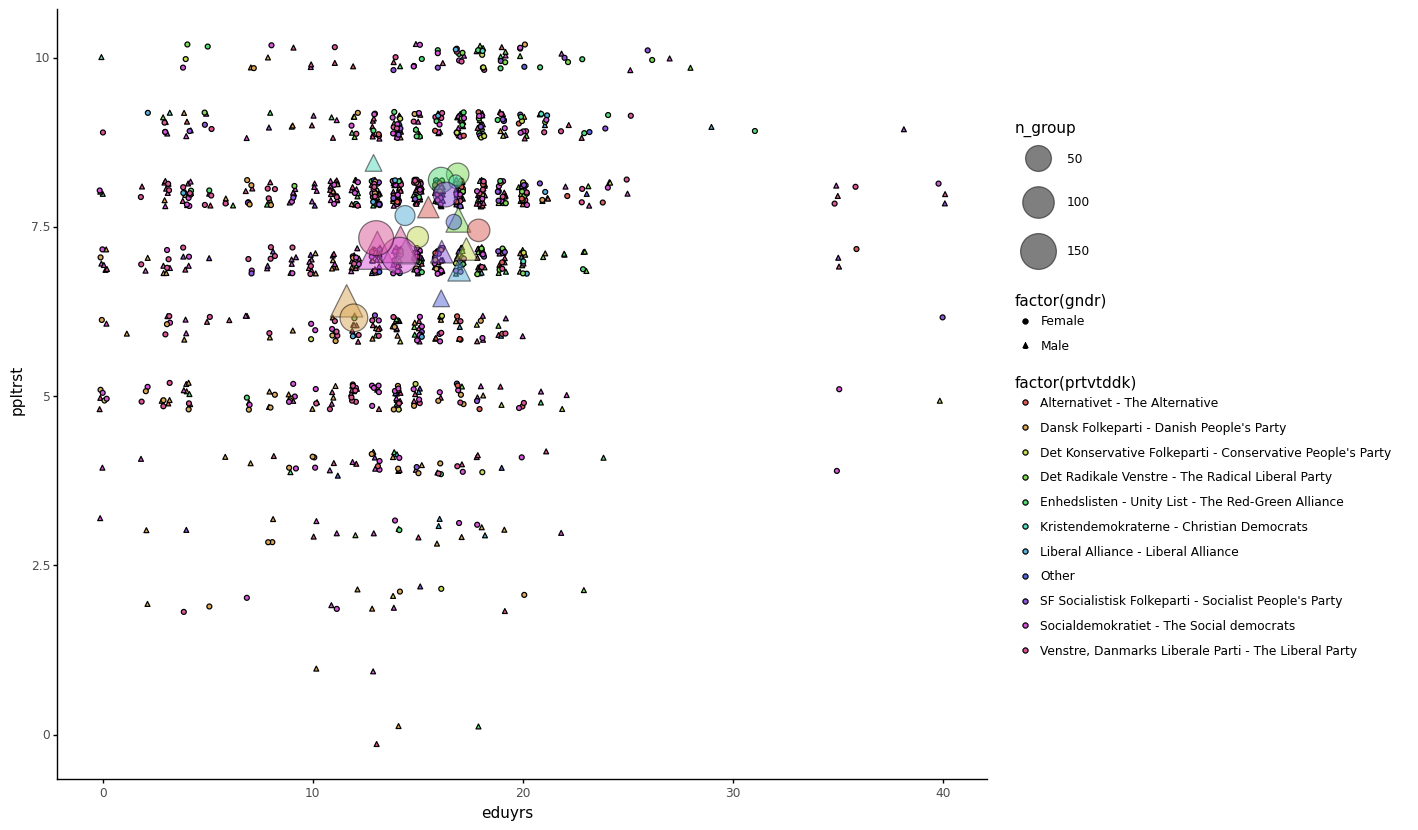

<ggplot: (-9223371926179066832)>

In [28]:
from plotnine import geom_point

(ggplot()
 + geom_jitter(data = ess_m, mapping = aes(x = 'eduyrs', y = 'ppltrst', shape = 'factor(gndr)', fill = 'factor(prtvtddk)'), height = 0.2, width = 0.2)
 + geom_point(data = ess_gs, mapping = aes(x = 'eduyrs_groupmean', y = 'ppltrst_groupmean', size = 'n_group', shape = 'factor(gndr)', fill = 'factor(prtvtddk)'), alpha = 0.5)
 + scale_size_continuous(range = (5,15))
 + theme_classic())

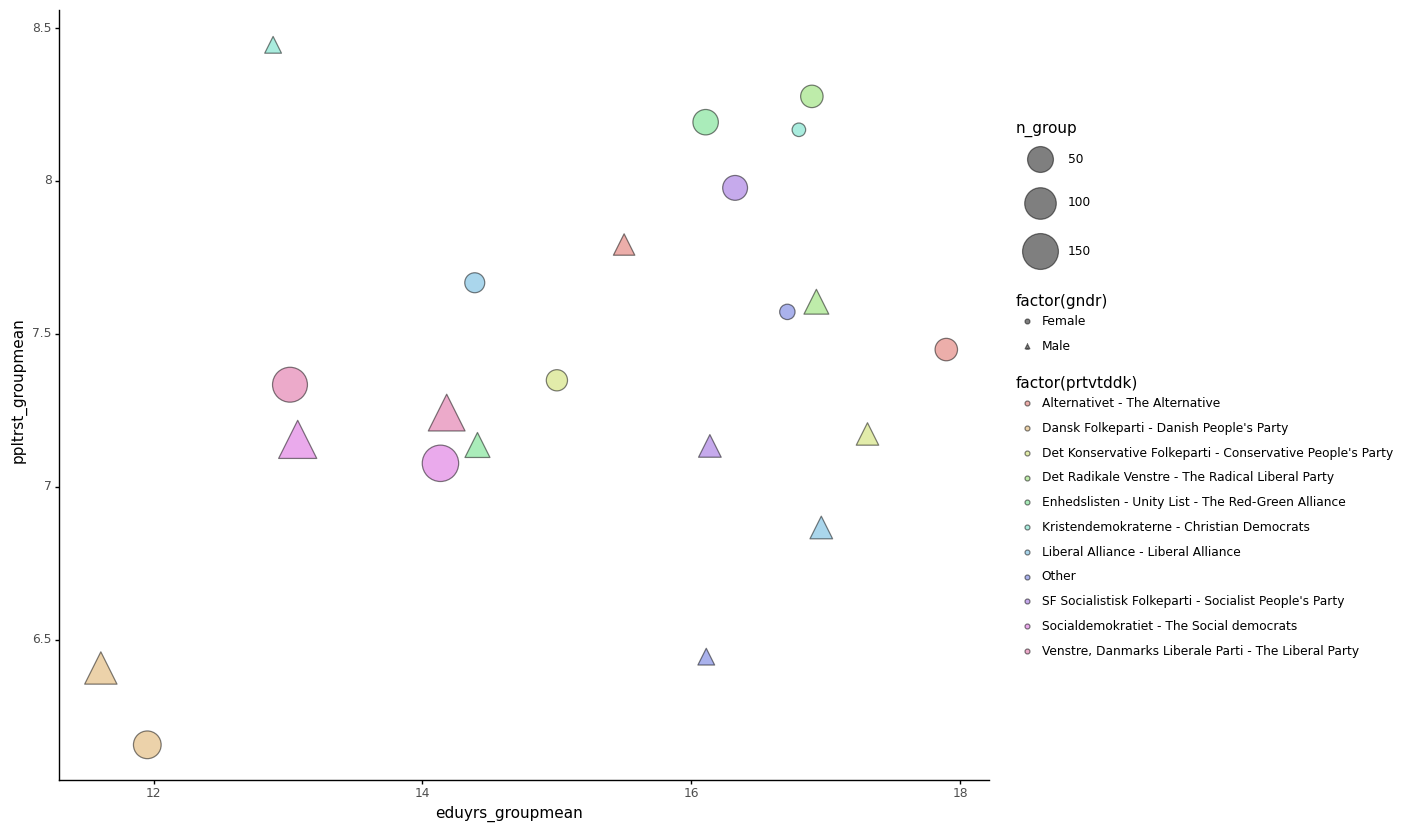

<ggplot: (-9223371926183057184)>

In [22]:
from plotnine import geom_point

(ggplot(ess_gs, aes(x = 'eduyrs_groupmean', y = 'ppltrst_groupmean', shape = 'factor(gndr)', fill = 'factor(prtvtddk)'))
 + geom_point(aes(size = 'n_group'), alpha = 0.5)
 + scale_size_continuous(range = [5,15])
 + theme_classic())